In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
from scipy import constants as const 

<center>Anna Lechner, Paula Erhard</center>

# PW7 - Wärme und Wärmetransport

## Wärmetransport

### Versuchsaufbau und Durchführung 
Für zwei Betriebsbedingungen der Glühlampe wird die Spannung der Photozelle bei verschiedenen Abständen  gemessen. Da der Photostrom proportional zur Beleuchtungsstärke ist, folgt auch die Spannung $U \propto E$. Die Messwerte werden als Spannung $U$ gegen $(1/r^{2})$ geplottet, da die Beleuchtungsstärke mit dem Abstandsgesetz skaliert. Aus den Steigungen der beiden Ausgleichsgeraden erhält man das Verhältnis der Lichtstärken. Mit den gemessenen Leistungen der beiden Heizspannungen werden schließlich die Strahlungstemperaturen bestimmt.

### Wichtige Formeln

Beleuchtungsstärke:
$$E = \frac{CI}{r^{2}}$$

Verhältnis der Lichtstärken:
$$\frac{I_{1}}{I_{2}} = \frac{a_{1}}{a_{2}}$$

Stefan–Boltzmann-Beziehung:
$$\frac{P_{1}}{P_{2}} = \frac{T_{1}^{4}}{T_{2}^{4}}$$

Temperaturbestimmung:
$$\ln\!\left(\frac{I_{1}}{I_{2}}\right)
= \frac{1}{T_{1}}
\left[\left(\frac{P_{1}}{P_{2}}\right)^{1/4} - 1\right]
\left(\frac{ch}{k\lambda}\right)$$



### Verwendete Geräte und Unsicherheiten

### Ergebnisse 

,r [mm],U_1 [V],U_2 [V]
0,0.5000+/-0.0014,0.0363+/-0.0006,0.0215+/-0.0005
1,0.5200+/-0.0014,0.0346+/-0.0006,0.0212+/-0.0005
2,0.5400+/-0.0014,0.0328+/-0.0006,0.0208+/-0.0005
3,0.5650+/-0.0014,0.0311+/-0.0005,0.0201+/-0.0005
4,0.5950+/-0.0014,0.0295+/-0.0005,0.0199+/-0.0005
5,0.6300+/-0.0014,0.0283+/-0.0005,0.0197+/-0.0005
6,0.6700+/-0.0014,0.0268+/-0.0005,0.0193+/-0.0005
7,0.7150+/-0.0014,0.0256+/-0.0005,0.0191+/-0.0005


Verhältnis der Stromstärken: $4.33+/-0.32$

$P_1 = 26.94+/-0.38 W$

$P_2 = 14.16+/-0.24 W$

$T_1 = 2952.31+/-110.32 K$

$T_2 = 2513.83+/-79.98 K$

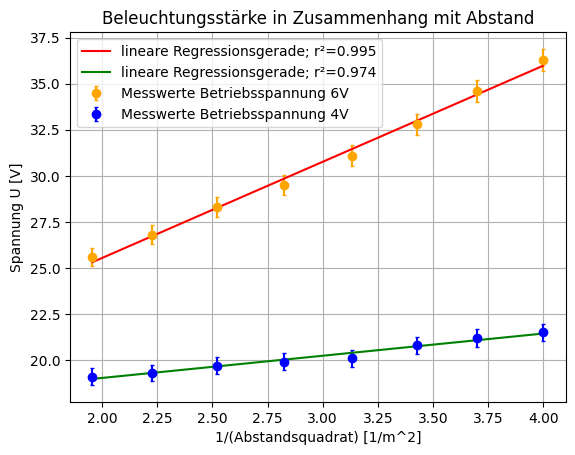

Die Steigung der 1. linearen Regrssionsgeraden ist: $a_1 = 5.22$

Die Steigung der 2. linearen Regrssionsgeraden ist: $a_2 = 1.21$

In [ ]:

_lambda = 580 *10**(-9)  #Wellenlänge Licht [nm]


#Betriebsbedingung 1: 6V
U_Lampe_1 = 6.04     #Betriebsspannung Lampe; einstellen [V] #was sind die Unsicherheiten?? 
U_Lampe_1_rel = (U_Lampe_1*0.003 + 0.03)/U_Lampe_1
uU_Lampe_1 = ufloat(U_Lampe_1, U_Lampe_1*U_Lampe_1_rel)

I_Lampe_1 = 4.46      #Betriebsstrom Lampe; ablesen [A]
I_Lampe_1_rel = (I_Lampe_1*0.005 + 0.03)/I_Lampe_1
uI_Lampe_1 = ufloat(I_Lampe_1, I_Lampe_1_rel*I_Lampe_1)

U_1 = np.array([36.3, 34.6, 32.8, 31.1, 29.5, 28.3, 26.8, 25.6]) #messen bei Photozelle; proportional Strom und somit auch Beleuchtungsstärke [V]
U_rel_1 = ((U_1*0.008) + 0.3)   #relative Unsicherheit; vom Datenblatt entnehmen [%]
uU_1 = unp.uarray(U_1, U_rel_1) /1000 #Spannung an Photozelle in uarray dargestellt [V]

#Betriebsbedingung 2: 4V
U_Lampe_2 = 4    #Betriebsspannung Lampe; einstellen [V]
U_Lampe_2_rel = (U_Lampe_2*0.003 + 0.03)/U_Lampe_2
uU_Lampe_2 = ufloat(U_Lampe_2, U_Lampe_2*U_Lampe_2_rel)

I_Lampe_2 = 3.54     #Betriebsstrom Lampe; ablesen [A]
I_Lampe_2_rel = (I_Lampe_2*0.005 + 0.03)/I_Lampe_2
uI_Lampe_2 = ufloat(I_Lampe_2, I_Lampe_2_rel*I_Lampe_2)

U_2 = np.array([21.5, 21.2, 20.8, 20.1, 19.9, 19.7, 19.3, 19.1])  #messen bei Photozelle; proportional Strom und somit auch Beleuchtungsstärke [V] 
U_rel_2 = ((U_2*0.008) + 0.3)   #relative Unsicherheit; vom Datenblatt entnehmen [%]
uU_2 = unp.uarray(U_2, U_rel_2) /1000 #Spannung an Photozelle in uarray dargestellt [V]

#Abstände (für beide gleich)
au = 1      #ableseunsicherheit bei Distanzmessung [mm]
l = ufloat(1500, au)
p = unp.uarray([1000, 980, 960, 935, 905, 870, 830, 785], au)    #Abstand zw Lampe und Photozelle [mm] #WICHTIG: bei beiden Betriebsbedingungen gleiche Abstände und äquidistant!!; nicht weniger als 500mm
r = (l-p) /1000  #[m]
r2 = unp.nominal_values(r**2)

#lineare regressionen für Berechnung des Intensitätsverhältnis
a_1, intercept_1, r_1, _, std_1 = linregress((1/r2), U_1)
a_2, intercept_2, r_2, _, std_2 = linregress((1/r2), U_2)

slope_1 = ufloat(a_1, std_1)
slope_2 = ufloat(a_2, std_2)

I_ratio = slope_1/slope_2   #welche unsicherheiten? nochanschauen

#elektrische Leistung
P_1 = uU_Lampe_1 * uI_Lampe_1     #[W]
P_2 = uU_Lampe_2 * uI_Lampe_2     #[W]
P_ratio = P_1/P_2
#Strahlungstemperaturen
faktor = (const.c * const.h)/(const.Boltzmann *_lambda) #c*h/k*lamda konstante in der formel

T_1 = (1/(np.log(unp.nominal_values(I_ratio)))) * ((P_ratio**(1/4))-1) * faktor
T_2 = (((T_1**4)*P_2)/P_1)**(1/4) 

# nur noch alles printen und schön darstellen
data = {'r [mm]': r, 'U_1 [V]': uU_1, 'U_2 [V]': uU_2}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte der Spannungen und Abstände"))


display(Markdown(f"Verhältnis der Stromstärken: ${I_ratio:.2f}$"))

display(Markdown(f"$P_1 = {P_1:.2f} W$"))
display(Markdown(f"$P_2 = {P_2:.2f} W$"))

display(Markdown(f"$T_1 = {T_1:.2f} K$"))
display(Markdown(f"$T_2 = {T_2:.2f} K$"))

plt.figure()
plt.errorbar((1/r2), U_1, yerr=U_rel_1, fmt='o', capsize=1.5, label="Messwerte Betriebsspannung 6V", color="orange")
plt.errorbar((1/r2), U_2, yerr=U_rel_2, fmt='o', capsize=1.5, label="Messwerte Betriebsspannung 4V", color="blue")
plt.plot((1/r2), (1/r2)*a_1+intercept_1, 'r-', label=rf"lineare Regressionsgerade; r²={r_1**2:.3f}")
plt.plot((1/r2), (1/r2)*a_2+intercept_2, 'g-', label=rf"lineare Regressionsgerade; r²={r_2**2:.3f}")
plt.xlabel("1/(Abstandsquadrat) [1/m^2]")
plt.ylabel("Spannung U [V]")
plt.title("Beleuchtungsstärke in Zusammenhang mit Abstand")
plt.legend()
plt.grid(True)
plt.show()

display(Markdown(f"Die Steigung der 1. linearen Regressionsgeraden ist: $a_1 = {a_1:.2f}$"))
display(Markdown(f"Die Steigung der 2. linearen Regressionsgeraden ist: $a_2 = {a_2:.2f}$"))





### Diskussion

## Wärmeleitfähigkeit von Metallen

### Versuchsaufbau und Durchführung
Für die Bestimmung der Wärmeleitfähigkeit wird ein Aluminiumstab an einem Ende beheizt und am anderen über einen Kupferblock gekühlt, bis ein stationärer Wärmestrom entsteht. Mit der Wärmebildkamera wird ein Temperaturprofil aufgenommen, aus dem der lineare Temperaturgradient $\Delta T / \Delta x$ bestimmt wird. Die Wärmeleitung folgt
$$\frac{\Delta Q}{\Delta t} = -\lambda A\,\frac{\Delta T}{\Delta x}$$
und die zugeführte Heizleistung lautet
$$P = \frac{U^{2}}{R}.$$
Aus Wärmestrom, Querschnittsfläche und Temperaturgradient wird schließlich die Wärmeleitfähigkeit $\lambda$ berechnet.

### Verwendetet Geräte und Unsicherheiten

### Ergebnisse

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_794/2736980138.py:23: SyntaxWarning: invalid escape sequence '\l'
  display(Markdown(f"$$\lambda = ({lambda_:.2f}) J/msK$$"))
/tmp/ipykernel_794/2736980138.py:42: SyntaxWarning: invalid escape sequence '\l'
  display(Markdown(f"Die ermittelte Wärmeleitfähigkeit von $\lambda = ({lambda_:.2f}) J/msK$ entspricht der von Aluminium mit Literaturwert $\lambda = ({Literaturwert}) J/msK$."))
/tmp/ipykernel_794/2736980138.py:42: SyntaxWarning: invalid escape sequence '\l'
  display(Markdown(f"Die ermittelte Wärmeleitfähigkeit von $\lambda = ({lambda_:.2f}) J/msK$ entspricht der von Aluminium mit Literaturwert $\lambda = ({Literaturwert}) J/msK$."))


$$\lambda = (262.18+/-4.62) J/msK$$

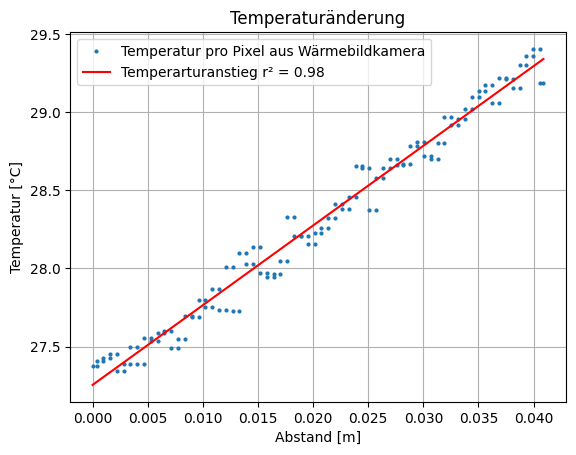

Die Steigung der linearen Regressionsfunktion ist (50.98+/-0.64)

Die ermittelte Wärmeleitfähigkeit von $\lambda = (262.18+/-4.62) J/msK$ entspricht der von Aluminium mit Literaturwert $\lambda = (235) J/msK$.

In [20]:
# Wärmeleitfähigkeit

u = 0.05
a = ufloat(10.1, u) * (10**(-3))     #Seitenlänge 1 der Querschnittsfläche [mm]
b = ufloat(4.4, u) * (10**(-3))    #Seitenlänge 2 der Querschnittsfläche [mm]
l = ufloat(40.9, u) * (10**(-3))    #länge auf der der Temperaunterschied stattfindet [mm]
A = a*b                  #Querschnittsfläche [mm²]
U = 14                   #[V]
R = 330                  #[Ohm]
K = U**2/R               #Konstante (dQ/dt) ermitteln aus Spannung und Widerstand (anscheinend)
l_nom = unp.nominal_values(l)

df = pd.read_csv("temp.txt", sep=',', decimal='.', engine='python')
px = df["d"].to_numpy()   #pixel aus csv file
t = df["t"].to_numpy()    #temperatur aus csv file
px_zahl = 66              #höchste Zahl aus csv file eintragen

slope, intercept, r, _, std = linregress((l_nom/px_zahl)*px, t)               #fitten für temperaturanstieg
steigung = ufloat(slope, std)

lambda_ = (K/(steigung*A))     #Wärmeleitfähigkeit

display(Markdown(f"$$\lambda = ({lambda_:.2f}) J/msK$$"))

#plot
plt.figure()
plt.plot((l_nom/px_zahl)*px, t, 'o', markersize=2, label="Temperatur pro Pixel aus Wärmebildkamera")
plt.plot((l_nom/px_zahl)*px, slope*((l_nom/px_zahl)*px)+intercept, 'r-', label=rf"Temperarturanstieg r² = {r**2:.2f}")
plt.xlabel("Abstand [m]")
plt.ylabel("Temperatur [°C]")
plt.title("Temperaturänderung")
plt.legend()
plt.grid(True)
plt.show()

display(Markdown(f"Die Steigung der linearen Regressionsfunktion ist ({steigung:.2f})"))


#Bestimmung ALuminium / Duraluminium
Literaturwert = 235     #Aluminium (falls notwendig ändern auf 170 --> Duraluminium) [J/msK]

display(Markdown(f"Die ermittelte Wärmeleitfähigkeit von $\lambda = ({lambda_:.2f}) J/msK$ entspricht der von Aluminium mit Literaturwert $\lambda = ({Literaturwert}) J/msK$."))

### Diskussion